# Theoretical Foundations of Buffer Stock Saving

<cite data-cite="6202365/8AH9AXN2"></cite>

<p style="text-align: center;"><small><small><small>Generator: BufferStockTheory-make/notebooks_byname</small></small></small></p>

[![econ-ark.org](https://img.shields.io/badge/Powered%20by-Econ--ARK-3e8acc.svg)](https://econ-ark.org/materials/BufferStockTheory)


<a id='interactive-dashboard'></a>

[This notebook](https://econ-ark.org/BufferStockTheory/#launch) uses the [Econ-ARK/HARK](https://github.com/econ-ark/HARK) toolkit to reproduce and illustrate key results of the paper [Theoretical Foundations of Buffer Stock Saving](http://econ-ark.github.io/BufferStockTheory/BufferStockTheory).

#### An [interactive dashboard](https://econ-ark.org/BufferStockStockTheory/#Dashboard) allows you to modify parameters to see how the figures change.


In [1]:
# This cell does some setup

# Import related generic python packages
from HARK.ConsumptionSaving.ConsIndShockModel import PerfForesightConsumerType
from copy import copy
from HARK.ConsumptionSaving.ConsIndShockModel import init_idiosyncratic_shocks as base_params
from HARK.utilities import plot_funcs, plot_funcs_der
from HARK.ConsumptionSaving.ConsIndShockModel import IndShockConsumerType
from HARK.utilities import find_gui, make_figs, determine_platform, test_latex_installation, setup_latex_env_notebook
import HARK
import numpy as np
from copy import deepcopy

# Plotting tools
import matplotlib.pyplot as plt

# Ignore some harmless but alarming warning messages
import warnings
warnings.filterwarnings("ignore")

# Code to allow a master "Generator" and derived "Generated" versions
#   - allows "$nb-Problems-And-Solutions → $nb-Problems → $nb"
Generator = True  # Is this notebook the master or is it generated?

# Whether to save the figures to Figures_dir
saveFigs = True

# Whether to draw the figures
drawFigs = True

if HARK.__version__ < '0.10.8':
    raise ImportError(
        'This notebook requires at least econ-ark v0.10.8,  please update your installation pip install -U econ-ark or conda install -c conda-forge econ-ark')

pf = determine_platform()
try:
    latexExists = test_latex_installation(pf)
except ImportError:  # windows and MacOS requires manual install
    latexExists = False

setup_latex_env_notebook(pf, latexExists)

# check if GUI is present if not then switch drawFigs to False and force saveFigs to be True
if not find_gui():
    drawFigs = False
    saveFigs = True

# Font sizes for figures
fssml=18
fsmid=22
fsbig=26

# this can be removed if we pass in saveFigs and drawFigs in every call to make('figure')
def make(figure_name, target_dir="../../Figures"):
    make_figs(figure_name, saveFigs, drawFigs, target_dir)

## [The Problem](http://econ-ark.github.io/BufferStockTheory/BufferStockTheory/#The-Problem)

The paper defines and calibrates a small set of parameters:

| Parameter | Description | Code | Value |
|:---:| ---         | ---  | :---: |
| $\PermGroFac$ | Permanent Income Growth Factor | $\texttt{PermGroFac}$ | 1.03 |
| $\Rfree$ | Interest Factor | $\texttt{Rfree}$ | 1.04 |
| $\DiscFac$ | Time Preference Factor | $\texttt{DiscFac}$ | 0.96 |
| $\CRRA$ | Coeﬃcient of Relative Risk Aversion| $\texttt{CRRA}$ | 2 |
| $\UnempPrb$ | Probability of Unemployment | $\texttt{UnempPrb}$ | 0.005 |
| $\tranShk^{\large u}$ | Income when Unemployed | $\texttt{IncUnemp}$ | 0. |
| $\permShkStd$ | Std Dev of Log Permanent Shock| $\texttt{PermShkStd}$ | 0.1 |
| $\TranShkStd$ | Std Dev of Log Transitory Shock| $\texttt{TranShkStd}$ | 0.1 |

that define the preferences and environment of microeconomic consumers as detailed below.

The objective of such a consumer with a horizon of $n$ periods is to maximize the value obtained from the stream of consumption __**c**__ from period $t=T-n$ to a terminal period $T$:

\begin{equation}
\mathbf{v}_{t} = \sum_{i=0}^{n} \DiscFac^{n}\mathrm{u}(\mathbf{c}_{t+n})
\end{equation}

The infinite-horizon solution to the model is defined as the limit of the solution in the first period of life $\mathrm{c}_{T-n}$ as the horizon $n$ goes to infinity.

### Details
For a microeconomic consumer who begins period $t$ with __**m**__arket resources boldface $\mLevBF_{t}$ (=net worth plus current income), the amount that remains after __**c**__onsumption of $\cLevBF_{t}$ will be end-of-period __**a**__ssets $\aLevBF_{t}$,

<!-- Next period's 'Balances' $B_{t+1}$ reflect this period's $\aLevBF_{t}$ augmented by return factor $R$:-->

\begin{eqnarray}
\aLevBF_{t}   &=&\mLevBF_{t}-\cLevBF_{t}. \notag
\end{eqnarray}

The consumer's __**p**__ermanent noncapital income $\pLevBF$ grows by a predictable factor $\PermGroFac$ and is subject to an unpredictable multiplicative shock $\Ex_{t}[\permShk_{t+1}]=1$,

\begin{eqnarray}
\pLevBF_{t+1} & = & \pLevBF_{t} \PermGroFac \permShk_{t+1}, \notag
\end{eqnarray}

and, if the consumer is employed, actual income is permanent income multiplied by a transitory shock $\tranShk^{\large e}$.  There is also a probability $\UnempPrb$ that the consumer will be temporarily unemployed and experience income of $\tranShk^{\large u}  = 0$.  We construct $\tranShk^{\large e}$ so that its mean value is $1/(1-\UnempPrb)$ because in that case the mean level of the transitory shock (accounting for both unemployed and employed states) is exactly

\begin{eqnarray}
\Ex_{t}[\tranShk_{t+1}] & = & \tranShk^{\large{u}}  \times \UnempPrb + (1-\UnempPrb) \times \Ex_{t}[\tranShk^{\large{e}}_{t+1}] \notag
\\ & = & 0 \times \UnempPrb + (1-\UnempPrb) \times 1/(1-\UnempPrb)  \notag
\\ & = & 1. \notag
\end{eqnarray}

  We can combine the unemployment shock $\tranShk^{\large u}$ and the transitory shock to employment income $\tranShk^{\large e}$ into $\tranShk _{t+1}$, so that next period's market resources are
\begin{eqnarray}
    \mLevBF_{t+1} &=& \aLevBF_{t}\Rfree +\pLevBF_{t+1}\tranShk_{t+1}.  \notag
\end{eqnarray}

When the consumer has a CRRA utility function $u(\cLevBF)=\frac{\cLevBF^{1-\CRRA}}{1-\CRRA}$, the paper shows that the problem can be written in terms of ratios (nonbold font) of level (bold font) variables to permanent income, e.g. $m_{t} \equiv \mLevBF_{t}/\pLevBF_{t}$, and the Bellman form of [the problem reduces to](https://econ-ark.github.io/BufferStockTheory/#The-Related-Problem):

\begin{eqnarray*}
v_t(m_t) &=& \max_{c_t}~~ u(c_t) + \DiscFac~\Ex_{t} [(\PermGroFac\permShk_{t+1})^{1-\CRRA} v_{t+1}(m_{t+1}) ] \\
& s.t. & \\
a_t &=& m_t - c_t \\
m_{t+1} &=& a_t \Rfree/(\PermGroFac \permShk_{t+1}) + \tranShk_{t+1} \\
\end{eqnarray*}

In [2]:
# Define a dictionary with baseline parameter values

# Import default parameter values (init_idiosyncratic_shock)
from HARK.ConsumptionSaving.ConsIndShockModel import init_idiosyncratic_shocks as base_params

# Set the parameters for the baseline results in the paper
# using the variable names defined in the cell above
base_params['PermGroFac'] = [1.03]  # Permanent income growth factor
base_params['Rfree']      = Rfree = 1.04  # Interest factor on assets
base_params['DiscFac']    = DiscFac = 0.96  # Time Preference Factor
base_params['CRRA']       = CRRA = 2.00  # Coefficient of relative risk aversion
# Probability of unemployment (e.g. Probability of Zero Income in the paper)
base_params['UnempPrb']   = UnempPrb = 0.005
base_params['IncUnemp']   = IncUnemp = 0.0   # Induces natural borrowing constraint
base_params['PermShkStd'] = [0.1]   # Standard deviation of log permanent income shocks
base_params['TranShkStd'] = [0.1]   # Standard deviation of log transitory income shocks

In [3]:
# Uninteresting housekeeping and details
# Make global variables for the things that were lists above -- uninteresting housekeeping
PermGroFac, PermShkStd, TranShkStd = base_params['PermGroFac'][0], base_params['PermShkStd'][0], base_params['TranShkStd'][0]

# Some technical settings that are not interesting for our purposes
base_params['LivPrb']      = [1.0]   # 100 percent probability of living to next period
base_params['CubicBool']   = True    # Use cubic spline interpolation
base_params['T_cycle']     = 1       # No 'seasonal' cycles
base_params['BoroCnstArt'] = None    # No artificial borrowing constraint

## Convergence of the Consumption Rules

Under the given parameter values, [the paper's first figure](https://econ-ark.github.io/BufferStockTheory/#Convergence-of-the-Consumption-Rules) depicts the successive consumption rules that apply in the last period of life $(c_{T}(m))$, the second-to-last period, and earlier periods $(c_{T-n})$.  The consumption function to which these converge is $c(m)$:

$$
c(m) = \lim_{n \uparrow \infty} c_{T-n}(m) \notag
$$


In [4]:
# Create a buffer stock consumer instance by invoking the IndShockConsumerType class
# with the built-in parameter dictionary "base_params"

# Construct finite horizon agent with baseline parameters
baseAgent_Fin = IndShockConsumerType(**base_params)
baseAgent_Fin.cycles = 100   # Set finite horizon (T = 100)

baseAgent_Fin.solve(verbose=0)        # Solve the model
baseAgent_Fin.unpack('cFunc')  # Make the consumption function easily accessible

Saving figure cFuncsConverge in ../../Figures


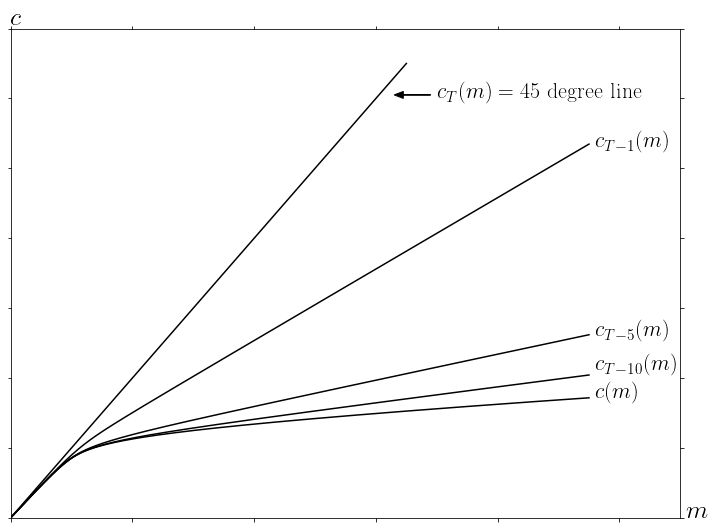

In [5]:
# Plot the different consumption rules for the different periods

mPlotMin = 0
mLocCLabels = 9.6  # Defines horizontal limit of figure
mPlotTop = 6.5    # Defines maximum m value where functions are plotted
mPts = 1000      # Number of points at which functions are evaluated

mBelwLabels = np.linspace(mPlotMin, mLocCLabels-0.1, mPts)  # Range of m below loc of labels
m_FullRange = np.linspace(mPlotMin, mPlotTop, mPts)        # Full plot range
# c_Tm0  defines the last period consumption rule (c=m)
c_Tm0 = m_FullRange
# c_Tm1 defines the second-to-last period consumption rule
c_Tm1 = baseAgent_Fin.cFunc[-2](mBelwLabels)
c_Tm5 = baseAgent_Fin.cFunc[-6](mBelwLabels)  # c_Tm5 defines the T-5 period consumption rule
c_Tm10 = baseAgent_Fin.cFunc[-11](mBelwLabels)  # c_Tm10 defines the T-10 period consumption rule
# c_Limt defines limiting inﬁnite-horizon consumption rule
c_Limt = baseAgent_Fin.cFunc[0](mBelwLabels)
plt.figure(figsize=(12, 9))
plt.plot(mBelwLabels, c_Limt, color="black")
plt.plot(mBelwLabels, c_Tm1, color="black")
plt.plot(mBelwLabels, c_Tm5, color="black")
plt.plot(mBelwLabels, c_Tm10, color="black")
plt.plot(m_FullRange, c_Tm0, color="black")
plt.xlim(0, 11)
plt.ylim(0, 7)
plt.text(7.0, 6.0, r'$c_{T   }(m) = 45$ degree line', fontsize=22, fontweight='bold')
plt.text(mLocCLabels, 5.3, r'$c_{T-1 }(m)$', fontsize=22, fontweight='bold')
plt.text(mLocCLabels, 2.6, r'$c_{T-5 }(m)$', fontsize=22, fontweight='bold')
plt.text(mLocCLabels, 2.1, r'$c_{T-10}(m)$', fontsize=22, fontweight='bold')
plt.text(mLocCLabels, 1.7, r'$c(m)       $', fontsize=22, fontweight='bold')
plt.arrow(6.9, 6.05, -0.6, 0, head_width=0.1, width=0.001,
          facecolor='black', length_includes_head='True')
plt.tick_params(labelbottom=False, labelleft=False, left='off',
                right='off', bottom='off', top='off')
plt.text(0, 7.05, "$c$", fontsize=26)
plt.text(11.1, 0, "$m$", fontsize=26)
# Save the figures in several formats

make('cFuncsConverge')  # Comment out if you want to run uninterrupted

Use the [interactive dashboard](#interactive-dashboard) to explore the effects of changes in patience, risk aversion, or risk

### PROBLEM: Natural Borrowing Constraint Approaches Artificial Constraint

Show numerically the result that is proven analytically in [The-Liquidity-Constrained-Solution-as-a-Limit](https://econ-ark.github.io/BufferStockTheory/#The-Liquidity-Constrained-Solution-as-a-Limit), by solving the model for successively smaller values of $\UnempPrb$.
   * You need only to solve for the second-to-last period of life to do this
      * `TwoPeriodModel = IndShockConsumerType(**base_params)`
      * `TwoPeriodModel.cycles = 2   # Make this type have a two period horizon (Set T = 2)`

   * You should show the consumption rules for different values of $\UnempPrb$ on the same graph
      * To make this easier, you will want to use the plot_funcs command:
         * `from HARK.utilities import plot_funcs_der, plot_funcs`

Create a cell or cells in the notebook below this cell and put your solution there; comment on the size of $\UnempPrb$ needed to make the two models visually indistinguishable

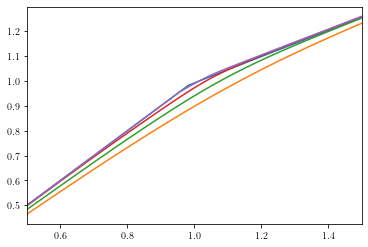

Drawing and storing solution


In [6]:
# SOLUTION

# Turns out that we have to make the probability REALLY small

# Construct solution for truly constrained consumer
baseBoroCnst = deepcopy(base_params)
baseBoroCnst['BoroCnstArt'] = 0.0  # Cannot borrow more than 0.0 of permanent income
baseBoroCnst['IncUnemp'] = 0.3  # Assume unemployment insurance of 0.3
baseBoroCnstEx = IndShockConsumerType(**baseBoroCnst)
baseBoroCnstEx.cycles = 2
baseBoroCnstEx.solve()
baseBoroCnstEx.unpack('cFunc')

cFuncList = list()  # Create empty list for storing consumption functions

# Period [0]  is infinite horizon solution
# Period [-1] is period-T solution (c=m)
# Period [-2] is the first 'interesting' period (where constraint matters)
cFuncList.append(baseBoroCnstEx.cFunc[-2])

# Now set up unconstrained two period solution
TwoPerAgent = IndShockConsumerType(**base_params)
TwoPerAgent.cycles = 2     # Make this type have a two period horizon (Set T = 2)

TwoPerAgent.solve()        # Solve the model under baseline parameter values
TwoPerAgent.unpack('cFunc')  # Make the consumption function easily accessible

# Consumption function for unconstrained
cFuncList.append(TwoPerAgent.cFunc[-2])

# Now consider three alternative values of unemployment probability
UnempPrbList = [0.001, 0.0001, 0.00001]

i = 0

for UnempPrb in UnempPrbList:
    TwoPerAgentNow = deepcopy(TwoPerAgent)
    TwoPerAgentNow.UnempPrb = UnempPrb
    TwoPerAgentNow.update_income_process()  # After changing parameters, recompute distn
    TwoPerAgentNow.solve()
    TwoPerAgentNow.unpack('cFunc')
    cFuncList.append(TwoPerAgentNow.cFunc[-2])  # Get the T-1 c function
    i += 1

# Zoom in on consumption function in a region near the BoroCnstArt kink point
RangeAroundPermInc = 0.5
PermIncNorm = 1
plot_funcs(cFuncList, PermIncNorm-RangeAroundPermInc, PermIncNorm+RangeAroundPermInc)

print('Drawing and storing solution')
if drawFigs:
    plt.show()
plt.close()

## Factors and Conditions

### [The Finite Human Wealth Condition](http://econ-ark.github.io/BufferStockTheory/#Human-Wealth)

Human wealth for a perfect foresight consumer is the present discounted value of future income:

\begin{eqnarray}\notag
\hLevBF_{t} & = & \Ex_{t}[\pLevBF_{t} + \Rfree^{-1} \pLevBF_{t+1} + \Rfree^{2} \pLevBF_{t+2} ... ] \\ \notag
      & = & \pLevBF_{t} \left(1 + (\PermGroFac/\Rfree) + (\PermGroFac/\Rfree)^{2} ... \right)
\end{eqnarray}
which approaches infinity as the horizon extends if $\PermGroFac/\Rfree \geq 1$.  We say that the 'Finite Human Wealth Condition' [(FHWC)](https://econ-ark.github.io/BufferStockTheory/#FHWC) holds if
$0 \leq (\PermGroFac/\Rfree) < 1$.

### [Absolute Patience and the AIC](https://econ-ark.github.io/BufferStockTheory/#AIC)

The paper defines the Absolute Patience Factor [(APF)](https://econ-ark.github.io/BufferStockTheory/#APF) as being equal to the ratio $\cLevBF_{t+1}/\cLevBF_{t}$ for a perfect foresight consumer.  The Old English character <span style="font-size:larger;">"&#222;"</span> used for this object in the paper cannot currently be rendered conveniently in Jupyter notebooks, so we will substitute $\APF$ here:

\begin{equation}
\PatFac = (\Rfree \DiscFac)^{1/\CRRA}
\end{equation}

If $\APF = 1$, a perfect foresight consumer will spend at exactly the level of $\cLevBF$ that can be sustained perpetually (given their current and future resources).  If $\APF < 1$ (the consumer is 'absolutely impatient'; or, 'the absolute impatience condition holds'), the consumer is consuming more than the sustainable amount, so consumption will fall, and if the consumer is 'absolutely patient' with $\APF > 1$ consumption will grow over time.



### [Growth Patience and the GICRaw](https://econ-ark.github.io/BufferStockTheory/#GIC)

For a [perfect foresight consumer](https://www.econ2.jhu.edu/people/ccarroll/public/lecturenotes/consumption/PerfForesightCRRA), whether the ratio $c$=__**c**__/__**p**__ is rising, constant, or falling depends on the relative growth rates of consumption and permanent income; that ratio is measured by the [Perfect Foresight Growth Patience Factor](https://econ-ark.github.io/BufferStockTheory/#PFGPF):

\begin{eqnarray}
\APF_{\PermGroFac} & = & \APF/\PermGroFac
\end{eqnarray}
and whether the $c$ is falling or rising over time depends on whether $\APF_{\PermGroFac}$ is below or above 1.

An analogous condition can be defined when there is uncertainty about permanent income.  Defining $\tilde{\PermGroFac} = (\Ex[\permShk^{-1}])^{-1}\PermGroFac$, the 'Growth Impatience Condition' [(GICRaw)](https://econ-ark.github.io/BufferStockTheory/#GIC) determines whether, \textit{in expectation}, the stochastic value of $c$ is rising, constant, or falling over time:
\begin{eqnarray}
  \APF/\tilde{\PermGroFac} & < & 1
\end{eqnarray}

### [The Finite Value of Autarky Condition (FVAC)](https://econ-ark.github.io/BufferStockTheory/#Autarky-Value)

The paper [shows](https://econ-ark.github.io/BufferStockTheory/#Autarky-Value) that a consumer who planned to spend his permanent income $\{ \pLevBF_{t}, \pLevBF_{t+1}, ...\} $ in every period would have value defined by

\begin{equation*}
\vLevBF_{t}^{\text{autarky}} = u(\pLevBF_{t})\left(\frac{1}{1-\DiscFac \PermGroFac^{1-\CRRA} \Ex[\permShk^{1-\CRRA}]}\right)
\end{equation*}

and defines the 'Finite Value of Autarky Condition' as the requirement that the denominator be a positive finite number:

\begin{equation*}
\DiscFac \PermGroFac^{1-\CRRA} \Ex[\permShk^{1-\CRRA}] < 1
\end{equation*}

### [The Weak Return Impatience Condition (WRIC)](https://econ-ark.github.io/BufferStockTheory/#WRIC)

The [Return Impatience Condition](https://econ-ark.github.io/BufferStockTheory/#RIC) $\APF/\Rfree < 1$ has long been understood to be required for the perfect foresight model to have a nondegenerate solution (a common special case is when $\CRRA=1$; in this case $\APF = \Rfree \DiscFac$ so $\APF<1$ reduces to $\DiscFac < \Rfree$).

If the RIC does not hold, the consumer is so patient that the optimal consumption function approaches zero as the horizon extends indefinitely.

When the probability of unemployment is $\UnempPrb$, the paper articulates an analogous (but weaker) condition:

\begin{eqnarray}
 \UnempPrb^{1/\CRRA} \APF/\Rfree & < & 1
\end{eqnarray}

# Key Results

## [Nondegenerate Solution Requires FVAC and WRIC](https://econ-ark.github.io/BufferStockTheory/#Sufficient-Conditions-For-Nondegenerate-Solution)

A main result of the paper is that the conditions required for the model to have a nondegenerate solution ($0 < c(m) < \infty$ for feasible $m$) are that the Finite Value of Autarky (FVAC) and Weak Return Impatience Condition (WRIC) hold.

## [Natural Borrowing Constraint limits to Artificial Borrowing Constraint](https://econ-ark.github.io/BufferStockTheory/#The-Liquidity-Constrained-Solution-as-a-Limit)

Defining $\chi(\UnempPrb)$ as the consumption function associated with any particular value of $\UnempPrb$, and defining $\hat{\chi}$ as the consumption function that would apply in the absence of the zero-income shocks but in the presence of an 'artificial' borrowing constraint requiring $a \geq 0$ (_a la_ Deaton (1991)), the paper shows that

\begin{eqnarray}
\lim_{\UnempPrb \downarrow 0}~\chi(\UnempPrb) & = & \hat{\chi}
\end{eqnarray}

That is, as $\UnempPrb$ approaches zero the problem with uncertainty becomes identical to the problem that instead has constraints.  (See [Precautionary Saving and Liquidity Constraints](https://econ-ark.github.io/LiqConstr) for a full treatment of the relationship between precautionary saving and liquidity constraints).

## [$c(m)$ can be Finite Even When Human Wealth Is Infinite](https://econ-ark.github.io/BufferStockTheory/#When-The-GICRaw-Fails)

In the perfect foresight model, if $\Rfree < \PermGroFac$ the PDV of future labor income approaches infinity and so the limiting consumption function is $c(m) = \infty$ for all $m$.  Many models have no well-defined solution when human wealth is infinite.

The presence of uncertainty changes this: Even when limiting human wealth is infinite, the limiting consumption function is finite for all values of $m$.

This is because uncertainty imposes a "natural borrowing constraint" that deters the consumer from borrowing against their unbounded (but uncertain) future labor income.

A [table](https://econ-ark.github.io/BufferStockTheory/#Sufficient-Conditions-For-Nondegenerate-Solution) puts this result in the context of implications of other conditions and restrictions.



## [Unique and Stable Values of $\mRat$](https://econ-ark.github.io/BufferStockTheory/#Unique-Stable-Points)

Assuming that the **FVAC** and **WRIC** hold so that the problem has a nondegenerate solution, under more stringent conditions its dynamics may also exhibit stability.  Two particularly useful kinds of stability are existence of a 'target' value of market resources $\Trg{\mRat}$ and a 'pseudo-steady-state' value $\StE{\mRat}$.

### [If the GIC-Nrm Holds, $\exists$ a finite 'target' $\Trg{\mRat}$](https://econ-ark.github.io/BufferStockTheory/#onetarget)

Section [Individual Target Wealth](https://econ-ark.github.io/BufferStockTheory/#onetarget) shows that, under parameter values for which the limiting consumption function exists, if the GICRaw holds then there will be a value $\Trg{m}$ such that:

\begin{eqnarray*}
\Ex[m_{t+1}] & > & m_{t}~\text{if $m_{t} < \Trg{m}$} \\
\Ex[m_{t+1}] & < & m_{t}~\text{if $m_{t} > \Trg{m}$} \\
\Ex[m_{t+1}] & = & m_{t}~\text{if $m_{t} = \Trg{m}$}
\end{eqnarray*}

[An equation](https://econ-ark.github.io/BufferStockTheory/#mTargImplicit) in the paper tells us that if $\mRat_{t}=\Trg{m}$ then:
\begin{align}
(\Trg{\mNrm}-\cFunc(\Trg{\mNrm}))\bar{\RNrm}+1 & = \Trg{\mNrm}
%\\ \Trg{\mNrm}(1-\bar{\RNrm}^{-1})+\bar{\RNrm}^{-1} & = \Trg{\cNrm}
%\\ \Trg{\cNrm} & = \Trg{\mNrm} - (\Trg{\mNrm} - 1)\bar{\RNrm}^{-1}
\end{align}
which can be solved numerically for the unique $\mNrm$ that satisfies it.

### [If the GIC Holds, $\exists$ a finite 'pseudo-steady-state' $\StE{\mRat}$](https://econ-ark.github.io/BufferStockTheory/#Collective-Stability)

Section [Collective Stability and the Pseudo-Steady-State](https://econ-ark.github.io/BufferStockTheory/#Collective-Stability) shows that, under parameter values for which the limiting consumption function exists, if the **GIC** holds then there will be a value $\Trg{m}$ such that:

\begin{eqnarray*}
\Ex_{t}[\mRatBF_{t+1}/\mRatBF_{t}] & > & \PermGroFac~\text{if $m_{t} < \StE{m}$} \\
\Ex_{t}[\mRatBF_{t+1}/\mRatBF_{t}] & < & \PermGroFac~\text{if $m_{t} > \StE{m}$} \\
\Ex_{t}[\mRatBF_{t+1}/\mRatBF_{t}] & = & \PermGroFac~\text{if $m_{t} = \StE{m}$}
\end{eqnarray*}

[An equation](https://econ-ark.github.io/BufferStockTheory/#balgrostableSolve) in the paper tells us that if $\mRat_{t}=\StE{m}$ then:
\begin{align}
(\StE{\mNrm}-\cFunc(\StE{\mNrm}))\RNrm+1 & = \StE{\mNrm}
\end{align}
which can be solved numerically for the unique $\StE{\mNrm}$ that satisfies it.


### [Example With Finite Pseudo-Steady-State $\StE{\mRat}$ But Infinite Target Wealth $\Trg{\mRat}$](https://econ-ark.github.io/BufferStockTheory/#GICNrmFailsButGICRawHolds)

[A figure](https://econ-ark.github.io/BufferStockTheory/#GICNrmFailsButGICRawHolds) depicts a solution when the **FVAC** (Finite Value of Autarky Condition) and **WRIC** hold (so that the model has a solution), the **GIC** holds, so the model has a pseudo-steady-state $\StE{\mRat}$, but the **GIC-Nrm** fails, so the model does not have an individual target wealth ratio $\Trg{\mRat}$ (or, rather, the target wealth ratio is infinity, as can be seen by the fact that the level of $\cRat$ is always below the level that would keep $\Ex_{t}[\Delta \mRat_{t+1}] = 0$)

This example was constructed by quadrupling the variance of the permanent shocks from the baseline parameterization

In [7]:
# GICNrmFailsButGICRawHolds Example
GICNrmFailsButGICRawHoldsDict = dict(base_params)
GICNrmFailsButGICRawHoldsDict['PermShkStd'] = [0.2] # Increase patience by increasing risk

# Because we are trying to solve a problem very close to the critical patience values
# be sure to do it with extra precision

# Solve with twice the normal number of gridpoints
GICNrmFailsButGICRawHoldsDict['aXtraMax'] = base_params['aXtraCount'] * 2

# Solve over a four times larger range 
GICNrmFailsButGICRawHoldsDict['aXtraCount'] = base_params['aXtraCount'] * 4

GICNrmFailsButGICRawHolds = IndShockConsumerType(
    cycles=0, # cycles=0 makes this an infinite horizon consumer
    verbose=3, # by default, check conditions won't print out any information
    **GICNrmFailsButGICRawHoldsDict)

# Solve to a tighter than usual degree of error tolerance
GICNrmFailsButGICRawHolds.tolerance = GICNrmFailsButGICRawHolds.tolerance/100

# The check_conditions method does what it sounds like it would
# verbose=0: Print nothing;
# verbose=3: Print all available info

GICNrmFailsButGICRawHolds.solve(verbose=2) 

The value of the Absolute Patience Factor (APF) for the supplied parameter values satisfies the Absolute Impatience Condition.
  Because the APF < 1, the absolute amount of consumption is expected to fall over time.
The value of the Return Patience Factor for the supplied parameter values satisfies the Return Impatience Condition.
  Therefore, the limiting consumption function is not c(m)=0 for all m
The Finite Human wealth factor value for the supplied parameter values satisfies the Finite Human Wealth Condition.
  Therefore, the limiting consumption function is not c(m)=Infinity
and human wealth normalized by permanent income is 104.00000000000037
and the PDV of future consumption growth is 25.48999599679675

The given parameter values violate the Normalized Growth Impatience Condition; the GPFNrm is: 1.0069735758414424
 Therefore, a target ratio of individual market resources to individual permanent income does not exist.  (see https://econ-ark.github.io/BufferStockTheory//#onetarge

Finished cycle # 000001 in  0.012346 seconds, solution distance = 1.000e+02
Finished cycle # 000002 in  0.059504 seconds, solution distance = 4.895e+01
Finished cycle # 000003 in  0.023374 seconds, solution distance = 1.630e+01
Finished cycle # 000004 in  0.025379 seconds, solution distance = 8.136e+00
Finished cycle # 000005 in  0.024439 seconds, solution distance = 4.872e+00
Finished cycle # 000006 in  0.025590 seconds, solution distance = 3.240e+00
Finished cycle # 000007 in  0.031914 seconds, solution distance = 2.307e+00
Finished cycle # 000008 in  0.034877 seconds, solution distance = 1.725e+00
Finished cycle # 000009 in  0.027808 seconds, solution distance = 1.337e+00
Finished cycle # 000010 in  0.024325 seconds, solution distance = 1.065e+00
Finished cycle # 000011 in  0.026044 seconds, solution distance = 8.679e-01
Finished cycle # 000012 in  0.024918 seconds, solution distance = 7.200e-01
Finished cycle # 000013 in  0.025836 seconds, solution distance = 6.063e-01
Finished cyc

Finished cycle # 000114 in  0.028439 seconds, solution distance = 1.165e-03
Finished cycle # 000115 in  0.026841 seconds, solution distance = 1.110e-03
Finished cycle # 000116 in  0.029804 seconds, solution distance = 1.058e-03
Finished cycle # 000117 in  0.027579 seconds, solution distance = 1.008e-03
Finished cycle # 000118 in  0.027392 seconds, solution distance = 9.598e-04
Finished cycle # 000119 in  0.028367 seconds, solution distance = 9.141e-04
Finished cycle # 000120 in  0.029357 seconds, solution distance = 8.705e-04
Finished cycle # 000121 in  0.028996 seconds, solution distance = 8.288e-04
Finished cycle # 000122 in  0.032705 seconds, solution distance = 7.890e-04
Finished cycle # 000123 in  0.028321 seconds, solution distance = 7.510e-04
Finished cycle # 000124 in  0.030067 seconds, solution distance = 7.147e-04
Finished cycle # 000125 in  0.028728 seconds, solution distance = 6.801e-04
Finished cycle # 000126 in  0.028884 seconds, solution distance = 6.470e-04
Finished cyc

Finished cycle # 000224 in  0.035212 seconds, solution distance = 2.318e-05
Finished cycle # 000225 in  0.033573 seconds, solution distance = 2.321e-05
Finished cycle # 000226 in  0.039586 seconds, solution distance = 2.322e-05
Finished cycle # 000227 in  0.038408 seconds, solution distance = 2.322e-05
Finished cycle # 000228 in  0.034460 seconds, solution distance = 2.320e-05
Finished cycle # 000229 in  0.033281 seconds, solution distance = 2.318e-05
Finished cycle # 000230 in  0.034895 seconds, solution distance = 2.314e-05
Finished cycle # 000231 in  0.034380 seconds, solution distance = 2.310e-05
Finished cycle # 000232 in  0.034181 seconds, solution distance = 2.304e-05
Finished cycle # 000233 in  0.033316 seconds, solution distance = 2.298e-05
Finished cycle # 000234 in  0.037450 seconds, solution distance = 2.291e-05
Finished cycle # 000235 in  0.035888 seconds, solution distance = 2.283e-05
Finished cycle # 000236 in  0.035554 seconds, solution distance = 2.274e-05
Finished cyc

Finished cycle # 000334 in  0.043229 seconds, solution distance = 9.149e-06
Finished cycle # 000335 in  0.040273 seconds, solution distance = 9.052e-06
Finished cycle # 000336 in  0.044449 seconds, solution distance = 8.957e-06
Finished cycle # 000337 in  0.041608 seconds, solution distance = 8.862e-06
Finished cycle # 000338 in  0.044447 seconds, solution distance = 8.768e-06
Finished cycle # 000339 in  0.046238 seconds, solution distance = 8.675e-06
Finished cycle # 000340 in  0.040105 seconds, solution distance = 8.584e-06
Finished cycle # 000341 in  0.041984 seconds, solution distance = 8.493e-06
Finished cycle # 000342 in  0.040032 seconds, solution distance = 8.403e-06
Finished cycle # 000343 in  0.040068 seconds, solution distance = 8.314e-06
Finished cycle # 000344 in  0.039251 seconds, solution distance = 8.227e-06
Finished cycle # 000345 in  0.041719 seconds, solution distance = 8.140e-06
Finished cycle # 000346 in  0.048109 seconds, solution distance = 8.054e-06
Finished cyc

Finished cycle # 000443 in  0.049896 seconds, solution distance = 2.950e-06
Finished cycle # 000444 in  0.045720 seconds, solution distance = 2.920e-06
Finished cycle # 000445 in  0.048074 seconds, solution distance = 2.891e-06
Finished cycle # 000446 in  0.046205 seconds, solution distance = 2.862e-06
Finished cycle # 000447 in  0.045216 seconds, solution distance = 2.833e-06
Finished cycle # 000448 in  0.049552 seconds, solution distance = 2.805e-06
Finished cycle # 000449 in  0.050101 seconds, solution distance = 2.776e-06
Finished cycle # 000450 in  0.051025 seconds, solution distance = 2.749e-06
Finished cycle # 000451 in  0.045280 seconds, solution distance = 2.721e-06
Finished cycle # 000452 in  0.046627 seconds, solution distance = 2.694e-06
Finished cycle # 000453 in  0.050836 seconds, solution distance = 2.667e-06
Finished cycle # 000454 in  0.045091 seconds, solution distance = 2.640e-06
Finished cycle # 000455 in  0.048916 seconds, solution distance = 2.614e-06
Finished cyc

Finished cycle # 000551 in  0.050182 seconds, solution distance = 1.008e-06
Finished cycle # 000552 in  0.048781 seconds, solution distance = 9.981e-07
Finished cycle # 000553 in  0.050136 seconds, solution distance = 9.884e-07
Finished cycle # 000554 in  0.057385 seconds, solution distance = 9.787e-07
Finished cycle # 000555 in  0.051939 seconds, solution distance = 9.692e-07
Finished cycle # 000556 in  0.051955 seconds, solution distance = 9.597e-07
Finished cycle # 000557 in  0.060232 seconds, solution distance = 9.503e-07
Finished cycle # 000558 in  0.053035 seconds, solution distance = 9.410e-07
Finished cycle # 000559 in  0.060057 seconds, solution distance = 9.319e-07
Finished cycle # 000560 in  0.050267 seconds, solution distance = 9.228e-07
Finished cycle # 000561 in  0.052479 seconds, solution distance = 9.138e-07
Finished cycle # 000562 in  0.056317 seconds, solution distance = 9.048e-07
Finished cycle # 000563 in  0.058029 seconds, solution distance = 8.960e-07
Finished cyc

Finished cycle # 000659 in  0.061371 seconds, solution distance = 3.513e-07
Finished cycle # 000660 in  0.057700 seconds, solution distance = 3.479e-07
Finished cycle # 000661 in  0.059135 seconds, solution distance = 3.445e-07
Finished cycle # 000662 in  0.062371 seconds, solution distance = 3.412e-07
Finished cycle # 000663 in  0.058321 seconds, solution distance = 3.379e-07
Finished cycle # 000664 in  0.061894 seconds, solution distance = 3.346e-07
Finished cycle # 000665 in  0.060615 seconds, solution distance = 3.314e-07
Finished cycle # 000666 in  0.058879 seconds, solution distance = 3.282e-07
Finished cycle # 000667 in  0.059001 seconds, solution distance = 3.250e-07
Finished cycle # 000668 in  0.057039 seconds, solution distance = 3.219e-07
Finished cycle # 000669 in  0.057387 seconds, solution distance = 3.187e-07
Finished cycle # 000670 in  0.054991 seconds, solution distance = 3.157e-07
Finished cycle # 000671 in  0.063948 seconds, solution distance = 3.126e-07
Finished cyc

Finished cycle # 000769 in  0.062786 seconds, solution distance = 1.209e-07
Finished cycle # 000770 in  0.067631 seconds, solution distance = 1.197e-07
Finished cycle # 000771 in  0.075077 seconds, solution distance = 1.186e-07
Finished cycle # 000772 in  0.072790 seconds, solution distance = 1.174e-07
Finished cycle # 000773 in  0.064489 seconds, solution distance = 1.163e-07
Finished cycle # 000774 in  0.065052 seconds, solution distance = 1.152e-07
Finished cycle # 000775 in  0.064122 seconds, solution distance = 1.141e-07
Finished cycle # 000776 in  0.072120 seconds, solution distance = 1.130e-07
Finished cycle # 000777 in  0.075032 seconds, solution distance = 1.119e-07
Finished cycle # 000778 in  0.072384 seconds, solution distance = 1.108e-07
Finished cycle # 000779 in  0.070920 seconds, solution distance = 1.097e-07
Finished cycle # 000780 in  0.065711 seconds, solution distance = 1.087e-07
Finished cycle # 000781 in  0.066381 seconds, solution distance = 1.076e-07
Finished cyc

Finished cycle # 000877 in  0.078553 seconds, solution distance = 4.253e-08
Finished cycle # 000878 in  0.071790 seconds, solution distance = 4.212e-08
Finished cycle # 000879 in  0.076167 seconds, solution distance = 4.171e-08
Finished cycle # 000880 in  0.073905 seconds, solution distance = 4.131e-08
Finished cycle # 000881 in  0.070837 seconds, solution distance = 4.091e-08
Finished cycle # 000882 in  0.066766 seconds, solution distance = 4.052e-08
Finished cycle # 000883 in  0.068027 seconds, solution distance = 4.013e-08
Finished cycle # 000884 in  0.072355 seconds, solution distance = 3.974e-08
Finished cycle # 000885 in  0.068656 seconds, solution distance = 3.936e-08
Finished cycle # 000886 in  0.080020 seconds, solution distance = 3.898e-08
Finished cycle # 000887 in  0.073877 seconds, solution distance = 3.861e-08
Finished cycle # 000888 in  0.072751 seconds, solution distance = 3.824e-08
Finished cycle # 000889 in  0.067385 seconds, solution distance = 3.787e-08
Finished cyc

Finished cycle # 000985 in  0.080455 seconds, solution distance = 1.497e-08
Finished cycle # 000986 in  0.071324 seconds, solution distance = 1.483e-08
Finished cycle # 000987 in  0.085388 seconds, solution distance = 1.469e-08
Finished cycle # 000988 in  0.083973 seconds, solution distance = 1.454e-08
Finished cycle # 000989 in  0.078238 seconds, solution distance = 1.440e-08
Finished cycle # 000990 in  0.081185 seconds, solution distance = 1.427e-08
Finished cycle # 000991 in  0.077269 seconds, solution distance = 1.413e-08
Finished cycle # 000992 in  0.076048 seconds, solution distance = 1.399e-08
Finished cycle # 000993 in  0.076442 seconds, solution distance = 1.386e-08
Finished cycle # 000994 in  0.083993 seconds, solution distance = 1.373e-08
Finished cycle # 000995 in  0.073523 seconds, solution distance = 1.359e-08
Finished cycle # 000996 in  0.073006 seconds, solution distance = 1.346e-08
Finished cycle # 000997 in  0.076062 seconds, solution distance = 1.333e-08
Finished cyc

The value of the Absolute Patience Factor (APF) for the supplied parameter values satisfies the Absolute Impatience Condition.
  Because the APF < 1, the absolute amount of consumption is expected to fall over time.
The value of the Return Patience Factor for the supplied parameter values satisfies the Return Impatience Condition.
  Therefore, the limiting consumption function is not c(m)=0 for all m
The Finite Human wealth factor value for the supplied parameter values satisfies the Finite Human Wealth Condition.
  Therefore, the limiting consumption function is not c(m)=Infinity
and human wealth normalized by permanent income is 104.00000000000037
and the PDV of future consumption growth is 25.48999599679675

The given parameter values violate the Normalized Growth Impatience Condition; the GPFNrm is: 1.0069735758414424
 Therefore, a target ratio of individual market resources to individual permanent income does not exist.  (see https://econ-ark.github.io/BufferStockTheory/#onetarget

Finished cycle # 001027 in  0.078246 seconds, solution distance = 9.977e-09


Saving figure GICNrmFailsButGICRawHolds in ../../Figures


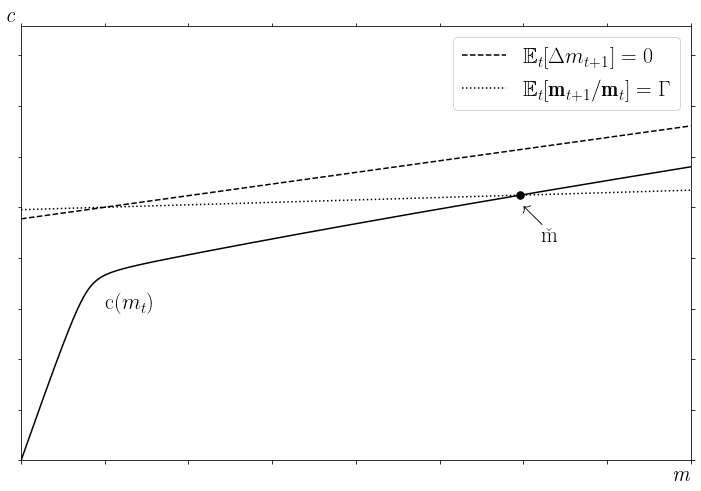

Finite mNrmStE but infinite mNrmTrg


In [8]:
# Plot GICNrmFailsButGICRawHolds

#fig = plt.figure(figsize = (12,8))
# ax  = fig.add_subplot(111)

fig, ax = plt.subplots(figsize = (12,8))
[xMin,xMax] = [0.0,8.0]
yMin = 0.0
yMax = GICNrmFailsButGICRawHolds.solution[0].c_where_Ex_mtp1_minus_mt_eq_0(xMax)*1.3

mPltVals = np.linspace(xMin, xMax, mPts)

if latexExists:
    c_Stable_Ind_txt = "$\Ex_{t}[\Delta m_{t+1}] = 0$"
    c_Stable_Agg_txt = "$\Ex_{t}[\pmb{\mathrm{m}}_{t+1}/\pmb{\mathrm{m}}_{t}] = \PermGroFac$"
else:
    c_Stable_Ind_txt = "$\mathsf{E}_{t}[\Delta m_{t+1}] = 0$"
    c_Stable_Agg_txt = "$\mathsf{E}_{t}[\mathbf{m}_{t+1}/\mathbf{m}_{t}] = \PermGroFac$"


cVals_Lmting_color="black"
c_Stable_Agg_color="black"#"blue"
c_Stable_Ind_color="black"  #"red"

cVals_Lmting=GICNrmFailsButGICRawHolds.solution[0].cFunc(mPltVals)
c_Stable_Ind=GICNrmFailsButGICRawHolds.solution[0].c_where_Ex_mtp1_minus_mt_eq_0(mPltVals)
c_Stable_Agg=GICNrmFailsButGICRawHolds.solution[0].c_where_Ex_PermShk_times_mtp1_minus_mt_eq_0(mPltVals)

cVals_Lmting_lbl, = ax.plot(mPltVals, cVals_Lmting, color=cVals_Lmting_color)
c_Stable_Ind_lbl, = ax.plot(mPltVals, c_Stable_Ind, 
                            color=c_Stable_Ind_color,linestyle="dashed",label=c_Stable_Ind_txt)
c_Stable_Agg_lbl, = ax.plot(mPltVals, c_Stable_Agg, 
                            color=c_Stable_Agg_color,linestyle="dotted",label=c_Stable_Agg_txt)

ax.set_xlim(xMin,xMax)
ax.set_ylim(yMin,yMax)
ax.set_xlabel("$\mathit{m}$",fontweight='bold',fontsize=fsmid,loc="right")
ax.set_ylabel("$\mathit{c}$",fontweight='bold',fontsize=fsmid,loc="top",rotation=0)
# plt.text(xMin,yMax+0.03, "$c$", fontsize=26)
# plt.text(xMax-0.05,yMin, "$m$", fontsize=26)
ax.tick_params(labelbottom=False, labelleft=False, left='off',
                right='off', bottom='off', top='off')

#ax.arrow(0.98, 0.62, -0.2, 0, head_width=0.02, width=0.001,facecolor='black', length_includes_head='True')
#ax.arrow(2.2, 1.2, 0.3, -0.05, head_width=0.02, width=0.001,facecolor='black', length_includes_head='True')

ax.legend(handles=[c_Stable_Ind_lbl,c_Stable_Agg_lbl])
ax.legend(prop=dict(size=fsmid))

mNrmStE = GICNrmFailsButGICRawHolds.solution[0].mNrmStE
cNrmStE = c_Stable_Agg=GICNrmFailsButGICRawHolds.solution[0].c_where_Ex_PermShk_times_mtp1_minus_mt_eq_0(mNrmStE)
#mNrmStE_lbl, = ax.plot([mNrmStE,mNrmStE],[yMin,yMax],color="green",linestyle="--",label='Pseudo-Steady-State: $\mathbb{E}_{t}[\pmb{m}_{t+1}/\pmb{m}_{t}]=\Gamma$')

ax.plot(mNrmStE,cNrmStE,marker=".",markersize=15,color="black") # Dot at StE point
ax.text(1, 0.6, "$\mathrm{c}(m_{t})$", fontsize=fsmid) # label cFunc

if latexExists:
    ax.text(mNrmStE+0.02,cNrmStE-0.10, r"$\nwarrow$", fontsize=fsmid)
    ax.text(mNrmStE+0.25,cNrmStE-0.18, r"$\phantom{\nwarrow} \StE{\mRat}$", fontsize=fsmid)
else:
    ax.text(mNrmStE+0.02,cNrmStE-0.10, r"$\nwarrow$", fontsize=fsmid)
    ax.text(mNrmStE+0.25,cNrmStE-0.18, r"$\phantom{\nwarrow} \StE{\mRat}$", fontsize=fsmid)

make('GICNrmFailsButGICRawHolds')
print('Finite mNrmStE but infinite mNrmTrg')

In the [interactive dashboard](#interactive-dashboard), see what happens as changes in the time preference rate (or changes in risk $\permShkStd$) change the consumer from _normalized-growth-patient_ $(\APF > \tilde{\PermGroFac})$ to _normalized-growth-impatient_ ($\APF < \tilde{\PermGroFac}$)

As a foundation for the remaining figures, we define another instance of the class $\texttt{IndShockConsumerType}$, which has the same parameter values as the instance $\texttt{baseAgent}$ defined previously but is solved to convergence (our definition of an infinite horizon agent type) instead of only 100 periods


In [9]:
# Find the infinite horizon solution
baseAgent_Inf = IndShockConsumerType(cycles=0    # Infinite horizon
                                     , verbose=0 # solve silently 
                                     , **base_params)
baseAgent_Inf.solve()

### [Target $m$, Expected Consumption Growth, and Permanent Income Growth](https://www.econ2.jhu.edu/people/ccarroll/papers/BufferStockTheory/#AnalysisoftheConvergedConsumptionFunction)

The next figure, [Analysis of the Converged Consumption Function](https://www.econ2.jhu.edu/people/ccarroll/papers/BufferStockTheory/#cGroTargetFig), shows expected growth factors for the levels of consumption $\cLevBF$ and market resources $\mLevBF$ as a function of the market resources ratio $\mRat$ for a consumer behaving according to the converged consumption rule, along with the growth factor for an unconstrained perfect foresight consumer which is constant at $\Pat$ and the growth factor for permanent income which is constant at $\PermGroFac$.  

The growth factor for consumption can be computed without knowing the _level_ of the consumer's permanent income:
\begin{eqnarray*}
\Ex_{t}[\cLevBF_{t+1}/\cLevBF_{t}] & = & \Ex_{t}\left[\frac{\pLevBF_{t+1}\cNrm_{t+1}(m_{t+1})}{\pLevBF_{t}\cNrm_{t}(m_{t})}\right] \\
& = & \Ex_{t}\left[\frac{\PermGroFac \permShk_{t+1} \pLevBF_{t}}{\pLevBF_{t}}\frac{\cNrm_{t+1}(m_{t+1})}{\cNrm_{t}(m_{t})}\right] \\
& = & \Ex_{t}\left[\frac{\PermGroFac \permShk_{t+1} \cNrm_{t+1}(m_{t+1})}{\cNrm_{t}(m_{t})}\right]
\end{eqnarray*}

and similarly the growth factor for market resources is:
\begin{eqnarray*}
\Ex_{t}[\mLevBF_{t+1}/\mLevBF_{t}] 
& = & \Ex_{t}\left[\frac{\PermGroFac \permShk_{t+1} \mNrm_{t+1}}{\mNrm_{t}}\right]
\end{eqnarray*}



Saving figure cGroTargetFig in ../../Figures


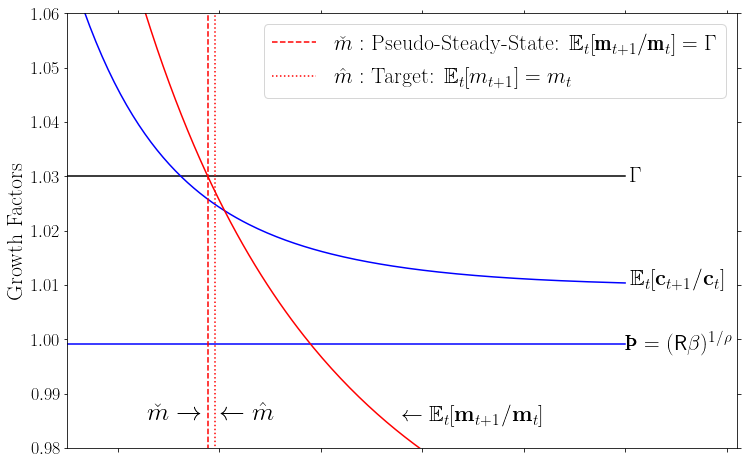

In [10]:
# Growth factors as a function of market resource ratio

color_cons = "blue"
color_mrkt = "red"
color_perm = "black"

mPlotMin = 0.0
mCalcMax = 50
mPlotMax = 2.20

# Get StE and target values
mNrmStE=baseAgent_Inf.solution[0].mNrmStE
mNrmTrg=baseAgent_Inf.solution[0].mNrmTrg

pts_num = 200 # Plot this many points

m_pts = np.linspace(1,mPlotMax,pts_num)        # values of m for plot
c_pts = baseAgent_Inf.solution[0].cFunc(m_pts) # values of c for plot 
a_pts = m_pts - c_pts                          # values of a 

Ex_cLev_tp1_Over_pLev_t = [baseAgent_Inf.solution[0].Ex_cLev_tp1_Over_pLev_t_from_at(a) for a in a_pts]
Ex_mLev_tp1_Over_pLev_t = [baseAgent_Inf.solution[0].Ex_mLev_tp1_Over_pLev_t_from_at(a) for a in a_pts]

Ex_cGro = np.array(Ex_cLev_tp1_Over_pLev_t)/c_pts
Ex_mGro = np.array(Ex_mLev_tp1_Over_pLev_t)/m_pts

# Retrieve parameters (makes code readable)
Rfree      = baseAgent_Inf.Rfree
DiscFac    = baseAgent_Inf.DiscFac
CRRA       = baseAgent_Inf.CRRA
PermGro    = baseAgent_Inf.PermGroFac[0]
mNrmStE    = baseAgent_Inf.solution[0].mNrmStE
mNrmTrg    = baseAgent_Inf.solution[0].mNrmTrg

# Absolute Patience Factor = lower bound of consumption growth factor
APF = (Rfree*DiscFac)**(1.0/CRRA)

# Create figure object 
fig = plt.figure(figsize = (12,8))
ax  = fig.add_subplot(111) # axes object 

# Plot the Absolute Patience Factor line
ax.plot([0,mPlotMax],[APF,APF],color=color_cons)

# Plot the Permanent Income Growth Factor line
ax.plot([0,mPlotMax],[PermGro,PermGro],color=color_perm)

# Plot the expected consumption growth factor
ax.plot(m_pts,Ex_cGro,color=color_cons)

# Plot the expected consumption growth factor on the right side of target m
ax.plot(m_pts,Ex_mGro,color="red")

# Axes limits 
GroFacMin = 0.98 #0.98
GroFacMax = 1.06 #1.08
xMin = 1.1 # 1.0

# Vertical lines at StE and Trg
mNrmStE_lbl, = ax.plot([mNrmStE,mNrmStE],[0,GroFacMax],color=color_mrkt,linestyle="--"
                       ,label='$\StE{m}:$ Pseudo-Steady-State: $\mathbb{E}_{t}[\pmb{\mathrm{m}}_{t+1}/\pmb{\mathrm{m}}_{t}]=\Gamma$')
mNrmTrg_lbl, = ax.plot([mNrmTrg,mNrmTrg],[0,GroFacMax],color=color_mrkt,linestyle="dotted"
                       ,label='$\Trg{m}:$ Target: $\mathbb{E}_{t}[m_{t+1}]=m_{t}$')
ax.text(mNrmStE-0.12,0.985, r'$\StE{m}\rightarrow$', fontsize = fsbig,fontweight='bold')
ax.text(mNrmTrg+0.01,0.985, r'$\leftarrow\Trg{m}$', fontsize = fsbig,fontweight='bold')

ax.legend(handles=[mNrmStE_lbl,mNrmTrg_lbl])
ax.legend(prop=dict(size=fsmid))

ax.set_xlim(xMin,mPlotMax * 1.1)
ax.set_ylim(GroFacMin,GroFacMax)

# If latex installed on system, plotting can look better 
if latexExists:
    ax.text(mPlotMax+0.01,1.01,"$\Ex_{t}[\cLevBF_{t+1}/\cLevBF_{t}]$",fontsize = fsmid,fontweight='bold')
    ax.text(mPlotMax*0.80,0.985+0.02*0,"$\leftarrow \Ex_{t}[\mLevBF_{t+1}/\mLevBF_{t}]$",fontsize = fsmid,fontweight='bold')
    ax.text(mPlotMax,0.998,r'$\pmb{\text{\TH}} = (\Rfree\DiscFac)^{1/\CRRA}$',fontsize = fsmid,fontweight='bold')
else:
    ax.text(mPlotMax+0.01,1.01,"$\mathsf{E}_{t}[\mathbf{c}_{t+1}/\mathbf{c}_{t}]$",fontsize = fsmid,fontweight='bold')
    ax.text(mPlotMax*0.80,0.985+0.02*0,"$\leftarrow \mathsf{E}_{t}[\mathbf{m}_{t+1}/\mathbf{m}_{t}]$",fontsize = fsmid,fontweight='bold')
    ax.text(mPlotMax,0.998,r'$\Phi = (\mathsf{\Rfree}\DiscFac)^{1/\CRRA}$',fontsize = fsmid,fontweight='bold')

# Ticks
ax.tick_params(labelbottom=False, labelleft=True,left='off',right='on',bottom='on',top='off')
plt.setp(ax.get_yticklabels(),fontsize=fssml)

ax.text(mPlotMax+0.01,1.029, r'$\PermGroFac$',fontsize = fsmid,fontweight='bold')
ax.set_ylabel('Growth Factors',fontsize = fsmid, fontweight='bold')

make('cGroTargetFig')

In the [interactive dashboard](#interactive-dashboard) see how target wealth changes when the consumer's time preference factor β or the growth factor Γ change.

### [Consumption Function Bounds](https://www.econ2.jhu.edu/people/ccarroll/papers/BufferStockTheory/#AnalysisOfTheConvergedConsumptionFunction)
[The next figure](https://www.econ2.jhu.edu/people/ccarroll/papers/BufferStockTheory/#cFuncBounds)
illustrates theoretical bounds for the consumption function.

We define two useful variables: lower bound of $\MPC$ (marginal propensity to consume) and limit of $h$ (Human wealth), along with some functions such as the limiting perfect foresight consumption function $\bar{c}(m)$, the upper bound function $\bar{\bar c}(m)$, and the lower bound function \underline{_c_}$(m)$.

In [11]:
# Define κ_Min, h_inf and PF consumption function, upper and lower bound of c function 

# Retrieve parameters (makes code below more readable)
R = Rfree      = baseAgent_Inf.Rfree
β = DiscFac    = baseAgent_Inf.DiscFac
ρ = CRRA       = baseAgent_Inf.CRRA
Γ = PermGro    = baseAgent_Inf.PermGroFac[0]
℘ = UnempPrb   = baseAgent_Inf.UnempPrb

mNrmTrg    = baseAgent_Inf.solution[0].mNrmTrg
mNrmStE    = baseAgent_Inf.solution[0].mNrmStE

κ_Min = 1.0-(R**(-1.0))*(R * β)**(1.0/ρ)
h_inf = (1.0/(1.0-Γ/R))

cFunc_Uncnst = lambda m: (h_inf -1)* κ_Min + κ_Min*m
cFunc_TopBnd = lambda m: (1 - ℘ ** (1/ρ)*(R*β)**(1.0/ρ)/R)*m
cFunc_BotBnd = lambda m: (1 -(R*β)**(1/ρ)/R) * m

Saving figure cFuncBounds in ../../Figures


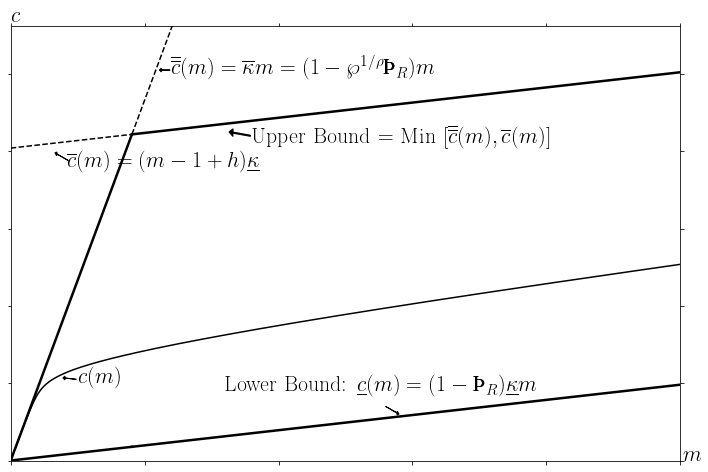

In [12]:
# Plot the consumption function and its bounds

cMaxLabel=r'$\overline{c}(m)= (m-1+h)\underline{\kappa}$'
cMinLabel=r'Lower Bound: $\underline{c}(m)= (1-\pmb{\text{\TH}}_{R})\underline{\kappa}m$'
if not latexExists:
    cMaxLabel=r'$\overline{c}(m) = (m-1+h)κ̲' # Use unicode kludge
    cMinLabel=r'Lower Bound: c̲$(m)= (1-\Phi_{R})m = κ̲ m$'

mPlotMax = 25
mPlotMin = 0
# mKnk is point where the two upper bounds meet
mKnk = ((h_inf-1)* κ_Min)/((1 - UnempPrb**(1.0/CRRA)*(Rfree*DiscFac)**(1.0/CRRA)/Rfree)-κ_Min)
mBelwKnkPts = 300
mAbveKnkPts = 700
mBelwKnk = np.linspace(mPlotMin,mKnk,mBelwKnkPts)
mAbveKnk = np.linspace(mKnk,mPlotMax,mAbveKnkPts)
mFullPts = np.linspace(mPlotMin,mPlotMax,mBelwKnkPts+mAbveKnkPts)

plt.figure(figsize = (12,8))

plt.plot(mFullPts,baseAgent_Inf.solution[0].cFunc(mFullPts), color="black")
plt.plot(mBelwKnk,cFunc_Uncnst(mBelwKnk)          , color="black",linestyle="--")
plt.plot(mAbveKnk,cFunc_Uncnst(mAbveKnk)          , color="black",linewidth=2.5)
plt.plot(mBelwKnk,cFunc_TopBnd(mBelwKnk)          , color="black",linewidth=2.5)
plt.plot(mAbveKnk,cFunc_TopBnd(mAbveKnk)          , color="black",linestyle="--")
plt.plot(mBelwKnk,cFunc_BotBnd(mBelwKnk)          , color="black",linewidth=2.5)
plt.plot(mAbveKnk,cFunc_BotBnd(mAbveKnk)          , color="black",linewidth=2.5)
plt.tick_params(labelbottom=False, labelleft=False,left='off',right='off',bottom='off',top='off')
plt.xlim(mPlotMin,mPlotMax)
plt.ylim(mPlotMin,1.12*cFunc_Uncnst(mPlotMax))
plt.text(mPlotMin,1.12*cFunc_Uncnst(mPlotMax)+0.05,"$c$",fontsize = 22)
plt.text(mPlotMax+0.1,mPlotMin,"$m$",fontsize = 22)
plt.text(2.5,1,r'$c(m)$',fontsize = 22,fontweight='bold')
if latexExists:
    plt.text(6,5,r'$\overline{\overline{c}}(m)= \overline{\MPC}m = (1-\UnempPrb^{1/\CRRA}\pmb{\text{\TH}}_{R})m$',fontsize = 22,fontweight='bold')
else:
    plt.text(6,5,r'$\overline{\overline{c}}(m)= \overline{\MPC}m = (1-\UnempPrb^{1/\CRRA}\Phi_{R})m$',fontsize = 22,fontweight='bold')
plt.text(2.10,3.8, cMaxLabel,fontsize = 22,fontweight='bold')
plt.text(9,4.1,r'Upper Bound $ = $ Min $[\overline{\overline{c}}(m),\overline{c}(m)]$',fontsize = 22,fontweight='bold')
plt.text(8,0.9,cMinLabel,fontsize = 22,fontweight='bold')
plt.arrow(2.45,1.05,-0.5,0.02,head_width= 0.05,width=0.001,facecolor='black',length_includes_head='True')
plt.arrow(2.15,3.88,-0.5,0.1,head_width= 0.05,width=0.001,facecolor='black',length_includes_head='True')
plt.arrow(8.95,4.20,-0.8,0.05,head_width= 0.1,width=0.015,facecolor='black',length_includes_head='True')
plt.arrow(5.95,5.05,-0.4,mPlotMin,head_width= 0.05,width=0.001,facecolor='black',length_includes_head='True')
plt.arrow(14,0.70,0.5,-0.1,head_width= 0.05,width=0.001,facecolor='black',length_includes_head='True')


make('cFuncBounds')

### [Upper and Lower Limits of the Marginal Propensity to Consume](https://www.econ2.jhu.edu/people/ccarroll/papers/BufferStockTheory/#MPCLimits)

The paper shows that as $m_{t}~\uparrow~\infty$ the consumption function in the presence of risk gets arbitrarily close to the perfect foresight consumption function.  Defining \underline{κ}
as the perfect foresight model's MPC, this implies that $\lim_{m_{t}~\uparrow~\infty} c^{\prime}(m) = $ \underline{κ}
.

The paper also derives an analytical limit $\bar{\MPC}$ for the MPC as $m$ approaches 0., its bounding value.  Strict concavity of the consumption function implies that the consumption function will be everywhere below a function $\bar{\MPC}m$, and strictly declining everywhere.  The last figure plots the MPC between these two limits.

Saving figure MPCLimits in ../../Figures


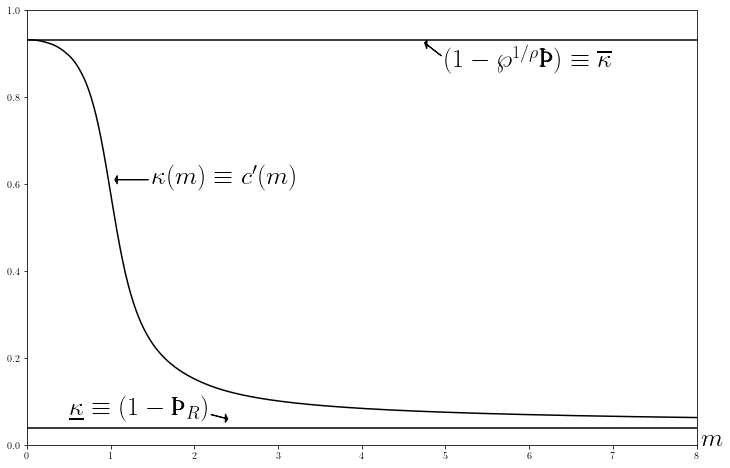

In [13]:
# The last figure shows the upper and lower limits of the MPC

# Retrieve parameters (makes code readable)
Rfree      = baseAgent_Inf.Rfree
DiscFac    = baseAgent_Inf.DiscFac
CRRA       = baseAgent_Inf.CRRA
PermGro    = baseAgent_Inf.PermGroFac[0]
mNrmTrg    = baseAgent_Inf.solution[0].mNrmTrg
mNrmStE    = baseAgent_Inf.solution[0].mNrmStE
UnempPrb   = baseAgent_Inf.UnempPrb

mPlotMax=8    

plt.figure(figsize = (12,8))
# Set the plot range of m
m = np.linspace(0.001,mPlotMax,mPts)

# Use the HARK method derivative to get the derivative of cFunc, and which constitutes the MPC
MPC = baseAgent_Inf.solution[0].cFunc.derivative(m)

# Define the upper bound of MPC
κ_Max = (1 - UnempPrb ** (1.0/CRRA)*(Rfree*DiscFac)**(1.0/CRRA)/Rfree)

# Define the lower bound of MPC
MPCLower = κ_Min

kappaDef=r'$\underline{\kappa}\equiv(1-\pmb{\text{\TH}}_{R})$'
if not latexExists:
    kappaDef=r'κ̲$\equiv(1-\Phi_{R})$'

plt.plot(m,MPC,color = 'black')
plt.plot([mPlotMin,mPlotMax],[κ_Max,κ_Max],color = 'black')
plt.plot([mPlotMin,mPlotMax],[κ_Min,κ_Min],color = 'black')
plt.xlim(mPlotMin,mPlotMax)
plt.ylim(0,1) # MPC bounds are between 0 and 1 
plt.text(1.5,0.6,r'$\MPC(m) \equiv c^{\prime}(m)$',fontsize = 26,fontweight='bold')
if latexExists:
    plt.text(5,0.87,r'$(1-\UnempPrb^{1/\CRRA}\pmb{\text{\TH}})\equiv \overline{\MPC}$',fontsize = 26,fontweight='bold') # Use Thorn character
else:
    plt.text(5,0.87,r'$(1-\UnempPrb^{1/\CRRA}\Phi_{R})\equiv \overline{\MPC}$',fontsize = 26,fontweight='bold') # Use Phi instead of Thorn (alas)

plt.text(0.5,0.07,kappaDef,fontsize = 26,fontweight='bold')
plt.text(mPlotMax+0.05,mPlotMin,"$m$",fontsize = 26)
plt.arrow(1.45,0.61,-0.4,mPlotMin,head_width= 0.02,width=0.001,facecolor='black',length_includes_head='True')
plt.arrow(2.2,0.07,0.2,-0.01,head_width= 0.02,width=0.001,facecolor='black',length_includes_head='True')
plt.arrow(4.95,0.895,-0.2,0.03,head_width= 0.02,width=0.001,facecolor='black',length_includes_head='True')

make('MPCLimits')

# Summary

[Two tables in the paper](https://econ-ark.github.io/BufferStockTheory/#Factors-Defined-And-Compared) summarize the various definitions, and then articulate conditions required for the problem to have a nondegenerate solution.  Among the nondegenerate cases, the most interesting result is that if the Growth Impatience Condition holds there will be a target level of wealth.

### Appendix: Options for Interacting With This Notebook <a id='optionsForInstalling'></a>

1. [View (static version)](https://github.com/llorracc/BufferStockTheory/blob/master/Code/Python/BufferStockTheory.ipynb) on GitHub (warning:  GitHub does not render Jupyter notebooks reliably)
1. [Launch Online Interactive Version](https://econ-ark.org/materials/BufferStockTheory/#launch)
1. For fast (local) execution, install [econ-ark](http://github.com/econ-ark) on your computer ([QUICK START GUIDE](https://github.com/econ-ark/HARK/blob/master/README.md)) then follow these instructions to retrieve the full contents of the `BufferStockTheory` [REMARK](https://github.com/econ-ark/REMARK):
   1. At a command line, change the working directory to the one where you want to install
       * On unix, if you install in the `/tmp` directory, the installation will disappear after a reboot:
       * `cd /tmp`
   1. `git clone https://github.com/econ-ark/REMARK --recursive`
   1. `cd REMARK/REMARKs/BufferStockTheory`
   1. `jupyter notebook BufferStockTheory.ipynb`

### Appendix: Perfect foresight agent failing both the FHWC and RIC

The value of the Absolute Patience Factor (APF) for the supplied parameter values satisfies the Absolute Impatience Condition.
  Because the APF < 1, the absolute amount of consumption is expected to fall over time.
The value of the Growth Patience Factor for the supplied parameter values satisfies the Perfect Foresight Growth Impatience Condition.
  Therefore, for a perfect foresight consumer, the ratio of individual wealth to permanent income will fall indefinitely.
The value of the Return Patience Factor for the supplied parameter values fails the Return Impatience Condition; the factor is 1.0101525445522108
  Therefore, if the FHWC is satisfied, the limiting consumption function is c(m)=0 for all m.
The given type violates the Finite Human Wealth Condition; the Finite Human wealth factor value is 1.010204081632653
  Therefore, the limiting consumption function is c(m)=Infinity for all m unless the RIC is also violated.  If both FHWC and RIC fail and the consumer faces a liquidity c

Saving figure PFGICRawHoldsFHWCFailsRICFails in ../../Figures


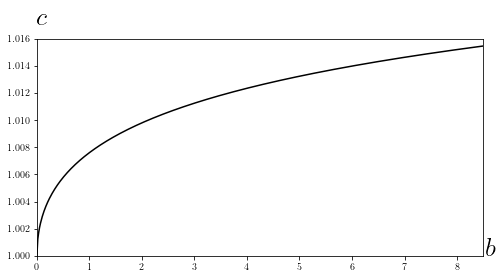

In [14]:
from copy import copy
from HARK.ConsumptionSaving.ConsIndShockModel import PerfForesightConsumerType
fig6_par = copy(base_params)

# Replace parameters.
fig6_par['Rfree'] = 0.98
fig6_par['DiscFac'] = 1
fig6_par['PermGroFac'] = [0.99]
fig6_par['CRRA'] = 2
fig6_par['BoroCnstArt']  = 0
fig6_par['T_cycle'] = 0
fig6_par['cycles'] = 0
fig6_par['quiet'] = False

# Create the agent
RichButPatientAgent = PerfForesightConsumerType(**fig6_par)
# Check conditions
RichButPatientAgent.check_conditions(verbose = 3)
# Solve
RichButPatientAgent.solve()

# Plot
mPlotMin, mPlotMax = 1, 9.5
plt.figure(figsize = (8,4))
m_grid = np.linspace(mPlotMin,mPlotMax,500)
plt.plot(m_grid-1, RichButPatientAgent.solution[0].cFunc(m_grid), color="black")
plt.text(mPlotMax-1+0.05,1,r"$b$",fontsize = 26)
plt.text(mPlotMin-1,1.017,r"$c$",fontsize = 26)
plt.xlim(mPlotMin-1,mPlotMax-1)
plt.ylim(mPlotMin,1.016)

make('PFGICRawHoldsFHWCFailsRICFails')

----------------------------------------------------------